In [2]:
from aircraft_env import Location
from aircraft_env import AircraftEnv
from utils.env_extra import env_summary
import numpy as np
%load_ext autoreload
%autoreload 2
loc_1 = Location(45.46873715, -73.74257166095532)
loc_2 = Location(49.0068908, 2.5710819691019156)
env = AircraftEnv(arrival_location=loc_1, destination=loc_2, n_waypoints=9)
# env.possible_altitudes = possible_altitudes
n = env.n_waypoints - 1
df = env_summary(env, agent=None)
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow,mach_number
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.00
1,3,1,229.769912,225.902016,694532.337536,3.930965,71.027558,60.838060,-0.176377,9600.0,3022.729700,1220.022016,0.000000,1779.977984,0.4036159821193608,0.75
2,0,2,225.803005,228.914043,708559.581350,6.005773,171.029668,50.480494,-1.294663,9600.0,3137.954612,1293.749776,3022.729700,1706.250224,0.4122907868955002,0.76
3,3,3,225.515077,231.926070,708817.868079,21.894781,336.606282,80.990747,5.246720,9600.0,3143.106335,1323.626388,6160.684311,1676.373612,0.4211204606104921,0.77
4,4,4,229.998592,238.838086,694423.231063,44.422421,177.241042,81.142431,-10.657707,10209.6,3019.249927,1280.650165,9303.790647,1719.349835,0.42416169444927154,0.80
5,2,5,196.662511,230.777587,699809.112278,43.931035,214.143190,77.070080,-7.449257,10819.2,3558.426609,1373.688488,12323.040574,1626.311512,0.3860381676141573,0.78
6,4,6,197.916953,224.252815,699778.607148,26.444102,287.467590,101.946630,0.650044,11428.8,3535.718378,1249.218787,15881.467183,1750.781213,0.353313995610684,0.76
7,1,7,231.972406,227.203510,749024.879045,4.934129,78.169619,92.882061,0.316009,11124.0,3228.939559,1191.366497,19417.185561,1808.633503,0.3689652516169537,0.77
8,4,8,251.447966,230.154205,645768.368437,23.234822,134.395809,111.892295,-2.214395,11428.8,2568.198818,941.571675,22646.125120,2058.428325,0.36662725203687296,0.78


In [4]:
possible_altitudes = np.load("possible_altitudes.npy")

In [14]:
df['fuel_burn'].sum()

9988.34887377833

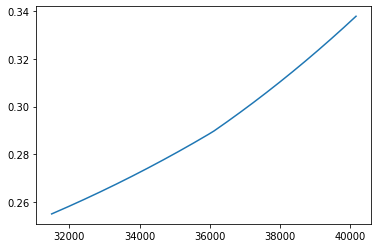

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils.units_converter import meter2feet
tas=200
altitude=meter2feet(np.linspace(env.cruise_alt_min, env.cruise_alt_max, 1000))

FF = env.aicraft.fuel_enroute(30000, tas, altitude, path_angle=0)
plt.plot(altitude, FF)

In [3]:
def aicraft_problem(x):
    env.reset()
    i = 0
    n = env.n_waypoints - 1
    
    for i in range(n):
        
        action = {}
        
        action['trajectory'] = int(np.round(x[n + 5*n + i]))
        ai = n + 5*i
        action['mach_number'] = x[i]
        if np.round(x[ai]) + np.round(x[ai+ 1]) + np.round(x[ai+2]) + np.round(x[ai+3]) + np.round(x[ai+4]) != 1:
            return 100000
        action['altitude'] = 0. * np.round(x[ai]) +  609.6 * np.round(x[ai + 1]) - 304.8 * \
                            np.round(x[ai + 2]) - 609.6 * \
                            np.round(x[ai + 3]) + 304.8 * np.round(x[ai + 4])
        
#         print(action)
        state, reward, done = env.step(action)
#         print(reward)
        if i == 0:
            f = reward
        else:
            f += reward
    return -f    
 

In [16]:
from scipy.optimize import NonlinearConstraint, LinearConstraint
nlcs = []
for i in range(n):
    ai = n + 5*i
    constr_f = lambda x: np.round(x[ai]) + np.round(x[ai+ 1]) + np.round(x[ai+2]) + np.round(x[ai+3]) + np.round(x[ai+4])
    nlc = NonlinearConstraint(constr_f, 0.9, 1.1)
    nlcs.append(nlc)


# the sum of x[0] and x[1] must be less than 1.9


In [6]:
for i in range(n):
    ai = n + 5*i
    k = lambda x: np.sum(np.array([np.round(x[ai + j]) for j in range(5)]))
    print(k(result.x))
#     constr_f = lambda x: 
#     nlc = NonlinearConstraint(constr_f, 0.999, 1.)
#     nlcs.append(nlc)

NameError: name 'result' is not defined

In [4]:
lower_x = [0 for _ in range(5*n)]
lower_x[::5] = [1 for _ in range(len(lower_x[::5]))]

lower_x2 = [0 for _ in range(5*n)]
lower_x2[::5] = [1 for _ in range(len(lower_x[::5]))]
mach_numbers = [
    (env.cruise_mach_range[0], env.cruise_mach_range[-1]) for _ in range(n)
]
altitude = [
    (0, 1) for i in range(5*n)
]
# altitude = [
    
# ]

In [5]:
from scipy.optimize import differential_evolution
import numpy as np

bounds = mach_numbers + altitude + [(0, 4) for _ in range(n)]
result = differential_evolution(aicraft_problem, bounds,x0= np.array([env.cruise_mach_range[0] for _ in range(n)] + \
                                                            lower_x + [2 for _ in range(n)]), polish=False,
                                seed=42, updating='deferred', workers=6, maxiter=20000)
result.x, result.fun

(array([0.75001907, 0.75028205, 0.75161219, 0.75275844, 0.75026626,
        0.7549734 , 0.75051566, 0.75109577, 0.45020372, 0.72356366,
        0.44116282, 0.48597583, 0.45043552, 0.1842265 , 0.56816163,
        0.24223454, 0.06348394, 0.25412741, 0.38867836, 0.80020152,
        0.27057149, 0.35229238, 0.05838059, 0.46608809, 0.71905493,
        0.37779459, 0.16883202, 0.12496074, 0.45358382, 0.24889738,
        0.46524726, 0.65553957, 0.06343753, 0.28708448, 0.5660275 ,
        0.13194843, 0.43453851, 0.35502023, 0.85975233, 0.21207652,
        0.48250888, 0.3922092 , 0.20816493, 0.68856742, 0.12558027,
        0.38567424, 0.48565316, 0.38360879, 1.63200981, 1.48938147,
        0.46500807, 0.01659825, 1.09626363, 0.28512655, 0.25489337,
        1.29659153]),
 -15328.95832454782)

In [6]:
result.success

True

In [7]:
class SolverAgent:
    def __init__(self, x):
        self.x = x
    
    def best_action(self, state):
        x = self.x
        i = state['waypoint']
        action = {}
        action['trajectory'] = int(np.round(x[n + 5*n + i]))
        ai = n + 5*i
        action['mach_number'] = x[i]
        action['altitude'] = 0. * np.round(x[ai]) +  609.6 * np.round(x[ai + 1]) - 304.8 * \
                            np.round(x[ai + 2]) - 609.6 * \
                            np.round(x[ai + 3]) + 304.8 * np.round(x[ai + 4])
        return action
agent = SolverAgent(result.x)      

In [8]:
df = env_summary(env, agent)
df

,trajectory,waypoint,speed,tas,distance,wind_magnitude,wind_direction,course,correction_angle,altitude,time_for_distance,fuel_burn,total_time,reward,fuel_flow,mach_number
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.000000
1,2,1,227.723045,223.916399,692678.387980,3.930965,71.027558,56.703470,-0.248856,10209.6,3041.757971,1165.216315,0.000000,1834.783685,0.3830733166758481,0.750019
2,1,2,221.275508,221.984976,694429.134740,5.769508,322.006729,58.329457,1.480255,10819.2,3138.300933,1143.194274,3041.757971,1856.805726,0.3642717183040586,0.750282
3,0,3,219.328992,221.777829,694421.546201,13.545263,326.163992,64.844214,3.461410,11428.8,3166.118351,1101.516679,6180.058905,1898.483321,0.3479076132050135,0.751612
4,0,4,219.710337,222.116052,692627.408837,37.808945,165.255611,76.520012,-9.798292,12038.4,3152.457094,1051.045368,9346.177255,1948.954632,0.3334051302060003,0.752758
5,1,5,215.549061,221.380685,694457.953821,35.106116,184.117391,89.130542,-9.089539,11428.8,3221.809225,1118.128967,12498.634349,1881.871033,0.34705002333936547,0.750266
6,0,6,203.945684,222.769619,694472.198170,19.104725,279.880104,89.596415,0.877236,12038.4,3405.182133,1139.600504,15720.443574,1860.399496,0.3346665344895008,0.754973
7,0,7,227.549539,221.454277,789611.989489,15.899425,172.685200,107.089034,-3.748731,12038.4,3470.066314,1152.532223,19125.625707,1847.467777,0.3321355035731979,0.750516
8,1,8,249.147210,221.625449,599373.980373,27.839582,122.362339,114.192916,-1.022787,12038.4,2405.702157,799.807348,22595.692021,2200.192652,0.3324631626940896,0.751096


In [9]:
df['fuel_burn'].sum()

8671.041675452181

In [97]:
np.round(result.x[n:])

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 1., 0., 0., 3.])

In [9]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

xm = np.array([[1, 2, 3], [1, 2, 3]]).T
print(xm.shape)
ym = np.array([0.1,0.2,0.3])

m = GEKKO()             # create GEKKO model
m.options.IMODE = 2     # solution mode
x = m.Param(value=np.array([[1, 2, 3], [1, 2, 3]]).T) # prediction points
y = m.Var()             # prediction results
m.cspline(x, y, xm, ym) # cubic spline
m.solve(disp=False)     # solve

# create plot
# plt.plot(altitude,FF,'bo')
# plt.plot(x.value,y.value,'r--',label='cubic spline')
# plt.legend(loc='best')

(3, 2)


Exception: Data arrays must have the same length

In [ ]:
m = GEKKO() # Initialize gekko
m.options.SOLVER=1  # APOPT is an MINLP solver

# optional solver settings with APOPT
m.solver_options = ['minlp_maximum_iterations 500', \
                    # minlp iterations with integer solution
                    'minlp_max_iter_with_int_sol 10', \
                    # treat minlp as nlp
                    'minlp_as_nlp 0', \
                    # nlp sub-problem max iterations
                    'nlp_maximum_iterations 50', \
                    # 1 = depth first, 2 = breadth first
                    'minlp_branch_method 1', \
                    # maximum deviation from whole number
                    'minlp_integer_tol 0.05', \
                    # covergence tolerance
                    'minlp_gap_tol 0.01']

mach_numbers = [
    m.Var(value=env.cruise_mach_range[0], lb=env.cruise_mach_range[0], ub=env.cruise_mach_range[-1]) for _ in range(n)
]

lower_x = [0 for _ in range(5*n)]
lower_x[::5] = [1 for _ in range(len(lower_x[::5]))]
altitude = [
    m.Var(value=lower_x[i], lb=0, ub=1, integer=True) for i in range(5*n)
]
# problem['xl'] = [env.cruise_mach_range[0] for _ in range(n)] + [0 for _ in range(5*n)]
# problem['xu'] = [env.cruise_mach_range[-1] for _ in range(n)] + [1 for _ in range(5*n)]

In [ ]:

def aicraft_problem(mach_numbers, altitude):
    env.reset()
    i = 0
    n = env.n_waypoints - 1
    
    for i in range(n):
        
        action = {}
        action['trajectory'] = 2
        ai = 5*i
        action['mach_number'] = mach_numbers[i]
        action['altitude'] = 0 * altitude[ai] +  609.6 * altitude[ai + 1] - 304.8 * altitude[ai + 2] - 609.6 * \
                            altitude[ai + 3] + 304.8 * altitude[ai + 4]
        
#         print(action)
        state, reward = env.solver_step(action, m)
#         print(reward)
        if i == 0:
            f = reward
        else:
            f += reward
    return f    

f = aicraft_problem(mach_numbers, altitude)  
m.Obj(f)

In [ ]:
m.solve()

In [ ]:
from utils.env_extra import env_summary

df = env_summary(env)
df